#                                            Pattern Recognision Assignment 1





In this assignment we must implement a Bayesian Classifier that decides if a patient is possibly endangered from cancer. 

After training the classifier from data we've been collecting for a long time,  our data follows gaussian probability density functions $p(\textbf{x}|ω_1)$ and $p(\textbf{x}|ω_2)$.
$\textbf{x}$ is the feature vector containing 2 individual features, $x_1$ and $x_2$ and they are 2 microbiological indicators extracted during sample examination blood and known to be associated with a particular form of cancer

Class 1 ($ω_1$ = Healthy) has mean $\textbf{μ}$ = [1.5 2.7] and variance $\textbf{σ}$ = [1.5 0.8]. Since correlation betweem $x_1$ and $x_2$ is 0, the covariance matrix is Σ = $diag(\sigma)$.

Class 2 ($ω_2$) is the healthy and has mean $\textbf{μ}$ = [0.4 0.8] and variance $\textbf{σ}$ = [1.5 0.8]. Since correlation betweem $x_1$ and $x_2$ is 0, the covariance matrix is Σ = $diag(\sigma)$.

The A priori probability of class $ω_1$ and $ω_2$ is $P(ω_1)$ = 0.95 and $P(ω_2)$ = 0.05 respectively.






First, we import the necessary packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal, norm

We initialize the mean vectors for the 2 classes ($ω_1$ and $ω_2$) and the covariance matrix. Next we create the 2 distributions. 

In [ ]:
mu_class_healthy = np.array([0.4, 0.8])
mu_class_cancer = np.array([1.5, 2.7])
P_omega1 = 0.95
P_omega2 = 0.05

#uncomment 3 lines to Run for partA
part = 'part A'
covariance_matrix1 = np.array([[1.5, 0],[0, 0.8]])
covariance_matrix2 = np.array([[1.5, 0],[0, 0.8]])


Px_omega1 = multivariate_normal(mu_class_healthy , covariance_matrix1)
Px_omega2 = multivariate_normal(mu_class_cancer , covariance_matrix2)

Let's plot the 2 distribution in a common plot.

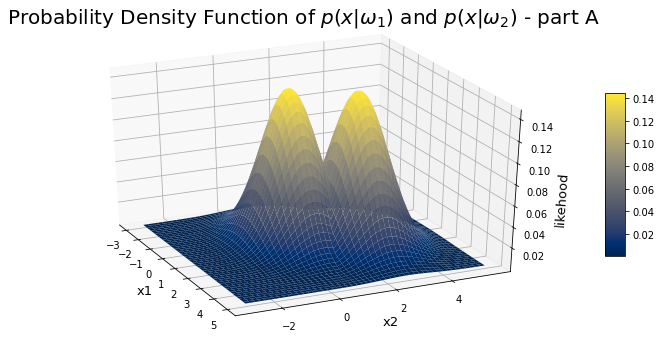

In [ ]:
"""----------------------------------3D PLOT------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
#Make a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, np.where(Px_omega1.pdf(pos) > Px_omega2.pdf(pos), Px_omega1.pdf(pos), Px_omega2.pdf(pos)),cmap='cividis',linewidth=0.2)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_zlabel('likehood', fontsize=13)
ax.set_title(label ='Probability Density Function of $p(x|\omega_1)$ and $p(x|\omega_2)$ - ' + part,fontsize=20,pad=15.0)
ax.view_init(30, -25)
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 8)
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
plt.show()


Here can see the 2 multivariable distributions of class $ω_1$ (on the left) and class $ω_2$ (on the right). The 2 classes are quite distinct even though there is some overlapping. Using the colormap of the plot, there is a high density of sample in the yellow areas of the plot.

 These plots present the distributions of $x$ indicators in case we already know whether patient has cancer or not. In the first case of $p(\textbf{x}|ω_1)$, it shows us the probability of $x_1$ and $x_2$ existing in a specific rage given that the patient to whom indicators $x_1$ and $x_2$ correspond to is a healthy patient. Respectively, knowing that a person is a cancer patient, $p(\textbf{x}|ω_2)$ shows the probability of indicators $x_1$ and $x_2$ being located in a specific rage on the plane. Note that PDFs show us the probability in a rage of the plane, and we have to integrate the function in this rage to get the probability. By pacing the polts in a common grid, we observe that there is an overlap. Some pairs of ($x_1,x_2$) are almost equaly possible to belong to a cancer patient or a healthy patient.

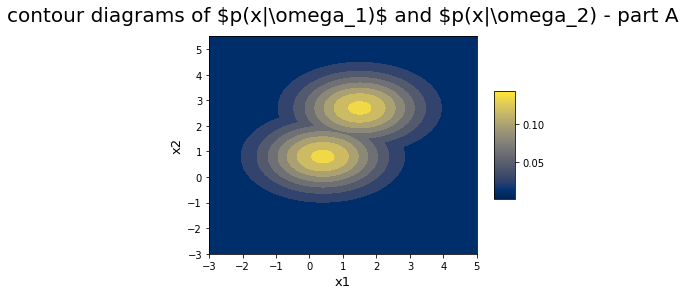

In [ ]:
"""----------------------------------CONTOUR------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

#Make contour plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, np.where(Px_omega1.pdf(pos) > Px_omega2.pdf(pos), Px_omega1.pdf(pos), Px_omega2.pdf(pos)),cmap='cividis')
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 5)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_title(label ='contour diagrams of $p(x|\omega_1)$ and $p(x|\omega_2) - ' + part,fontsize=20,pad=15.0)

plt.show()

This is the contour plot of the 2 probability density functions. We plot the contour to achieve a better understanding of the overlapping area between $p(\textbf{x}|ω_1)$ and $p(\textbf{x}|ω_2)$. This means that classification error is inevitable. The total classification error is affexted by the overlapping **volume** between the 2 surfaces.  

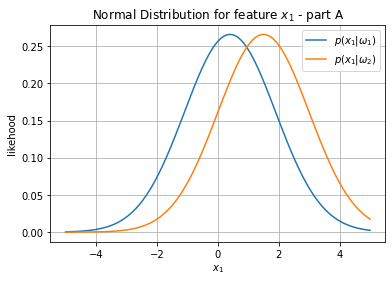

In [ ]:
x = np.linspace(-5,5,1000)
plt.plot(x, norm.pdf(x, mu_class_healthy[0] , covariance_matrix1[0,0]),label = r'$p(x_1|\omega_1)$')

plt.plot(x, norm.pdf(x, mu_class_cancer[0] , covariance_matrix2[0,0]), label = r'$p(x_1|\omega_2)$')
plt.grid()
plt.title('Normal Distribution for feature $x_1$ - ' + part)
plt.xlabel('$x_1$')
plt.ylabel('likehood')
plt.legend()
plt.show()

Probability Distribution of feature $x_1$ when the example is in class $\omega_1$ and when it is in $\omega_2$. Here we can examine how feature $x_1$ influences the final decision. We can see that the overlapping area between the 2 curves (classification error only for $x_1$) is quite large. 

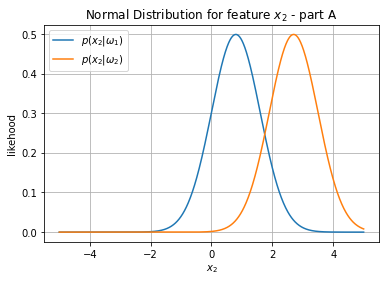

In [ ]:
x = np.linspace(-5,5,1000)
rv1 = norm(mu_class_healthy[1] , covariance_matrix1[1,1])
rv2 = norm(mu_class_cancer[1] , covariance_matrix2[1,1])
plt.plot(x, norm.pdf(x, mu_class_healthy[1] , covariance_matrix1[1,1]),label = r'$p(x_2|\omega_1)$')
plt.plot(x, norm.pdf(x, mu_class_cancer[1] , covariance_matrix2[1,1]), label = r'$p(x_2|\omega_2)$')
plt.grid()
plt.title('Normal Distribution for feature $x_2$ - ' +part)
plt.xlabel('$x_2$')
plt.ylabel('likehood')
plt.legend()
plt.show()

Probability Distribution of feature $x_2$ when the example is in class $\omega_1$ and when it is in $\omega_2$. In this case the classification error is much smaller and the distinction between the 2 classes is easier.

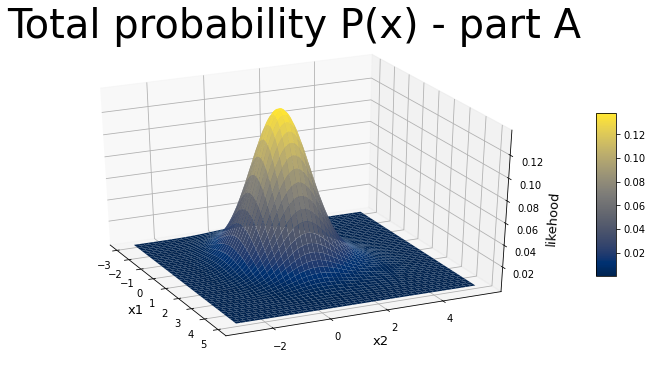

In [ ]:
"""----------------------------------3D PLOT OF TOTAL PROBABILITY------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#Make a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, totalProbability,cmap='cividis',linewidth=0.2)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_zlabel('likehood', fontsize=13)
ax.set_title(label ='Total probability P(x) - ' + part,fontsize=40,pad=20.0)
ax.view_init(30, -25)
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 8)
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
plt.show()

The total probability is the likehood of feature vector $\textbf{x}$ = [$x_1$ $x_2$] happening (without taking under consideration the class of the subject)when using the occuring $p(\textbf{x}$) = p($\textbf{x}$|$ω_1$)Ρ($ω_1$) + p($\textbf{x}$|$ω_2$)Ρ($ω_2$)

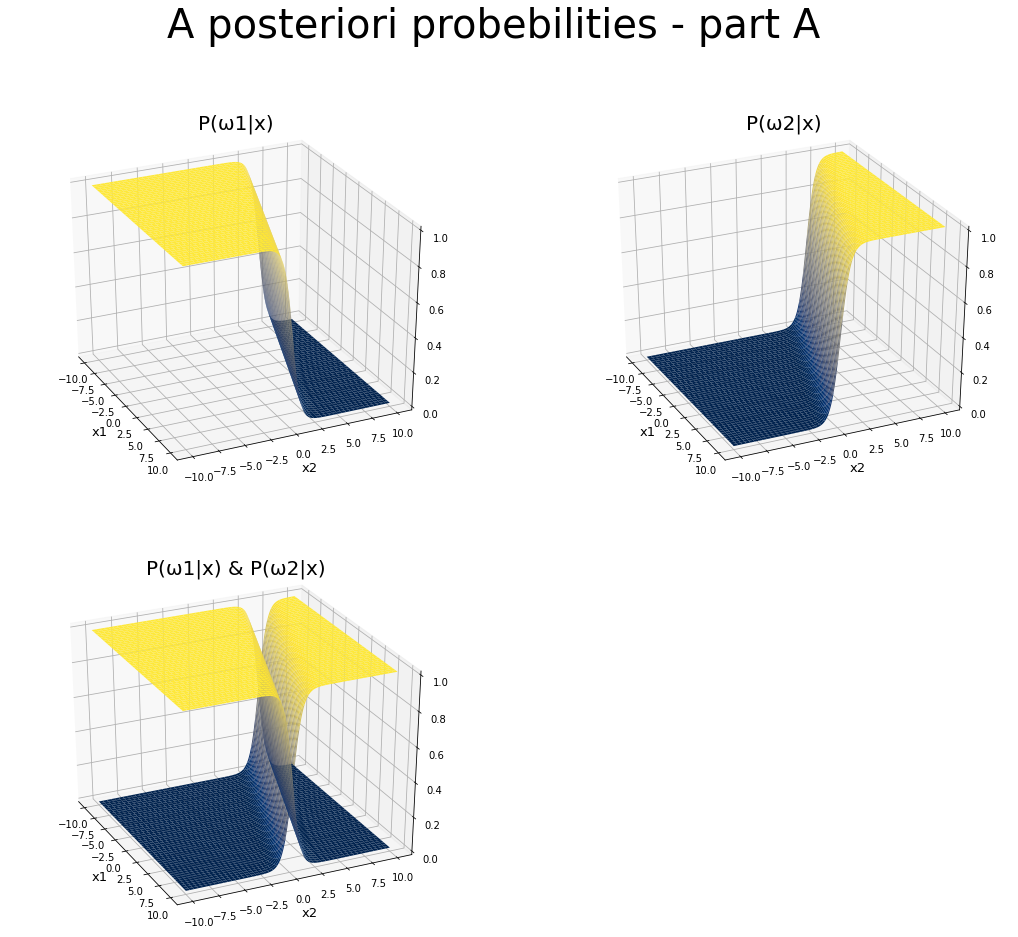

In [ ]:
"""----------------------------------3D PLOT OF A POSTERIORI PROBABILITIES ------------------------------------"""
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#calculate a posteriori probabilities for the two categories
Pomega1_x = (Px_omega1.pdf(pos) * P_omega1) / totalProbability
Pomega2_x = (Px_omega2.pdf(pos) * P_omega2) / totalProbability

#create the 3D plots
fig = plt.figure(figsize = (18,15))
fig.suptitle("A posteriori probebilities - " + part,fontsize=40)

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

ax1.plot_surface(X, Y, Pomega1_x,cmap='cividis',linewidth=0)
ax1.set_xlabel('x1', fontsize=13)
ax1.set_ylabel('x2', fontsize=13)
ax1.set_title(label ='P(\u03C91|x)',fontsize=20,pad=15.0)
ax1.view_init(30, -25)

ax2.plot_surface(X, Y, Pomega2_x,cmap='cividis',linewidth=0)
ax2.set_xlabel('x1', fontsize=13)
ax2.set_ylabel('x2', fontsize=13)
ax2.set_title(label ='P(\u03C92|x)',fontsize=20,pad=15.0)
ax2.view_init(30, -25)

ax3.plot_surface(X, Y, Pomega1_x,cmap='cividis',linewidth=0)
ax3.plot_surface(X, Y, Pomega2_x,cmap='cividis',linewidth=0)
ax3.set_xlabel('x1', fontsize=13)
ax3.set_ylabel('x2', fontsize=13)
ax3.set_title(label ='P(\u03C91|x) & P(\u03C92|x)',fontsize=20,pad=15.0)
ax3.view_init(30, -25)

plt.show()

Here a posteriori Probability Density Functions $p(ω_1|\textbf{x})$ and $p(ω_2|\textbf{x})$ are presented. These show the probabiblity of a patient to belong in the first class or the second class knowing their $x$ indicators. The fact that we take under consideration their indicators, makes these probailities, a posteriori probabilities. They are calculated through bayes rule $p(ω_1|\textbf{x}) = \frac{p(\textbf{x}|ω_1)}{total probability}$, $p(ω_2|\textbf{x}) = \frac{p(\textbf{x}|ω_2)}{total probability}$. 

Given the $x$ indicators of the person, it shows the probability of them belonging in the first or second class respectively. In the third plot, they are olaced in the same grid. Since a person can either be healthy or have cancer, we observe that the sum of the two functions over the $x_1,x_2$ plane will always be equal to 1. In addition there is a line on the plane, in which the two posibbilities are equal.

In [ ]:
#Calculate Bayesian error
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#calculate a posteriori probabilities for the two categories
Pomega1_x = (Px_omega1.pdf(pos) * P_omega1) / totalProbability
Pomega2_x = (Px_omega2.pdf(pos) * P_omega2) / totalProbability

error = 0

for i in range(0,1000):
  for j in range(0,1000):
    if Pomega1_x[i][j] > Pomega2_x[i][j]:
      error = error + Px_omega2.pdf(pos[i,j,:]) * P_omega2 *0.0004
    if Pomega2_x[i][j] >= Pomega1_x[i][j]:
      error = error + Px_omega1.pdf(pos[i,j,:]) * P_omega1 * 0.0004
      
print("Bayesian error for " + part + " is:" ,error)

Bayesian error for part A is: 0.03456325895186966


# **PART B**

In [ ]:
mu_class_healthy = np.array([0.4, 0.8])
mu_class_cancer = np.array([1.5, 2.7])
P_omega1 = 0.95
P_omega2 = 0.05

#uncomment 3 lines to Run for partA

part = 'part B'
covariance_matrix1 = np.array([[1.5, 0],[0, 0.8]])
covariance_matrix2 = np.array([[1.5, 0],[0, 0.8]]) / 4

Px_omega1 = multivariate_normal(mu_class_healthy , covariance_matrix1)
Px_omega2 = multivariate_normal(mu_class_cancer , covariance_matrix2)

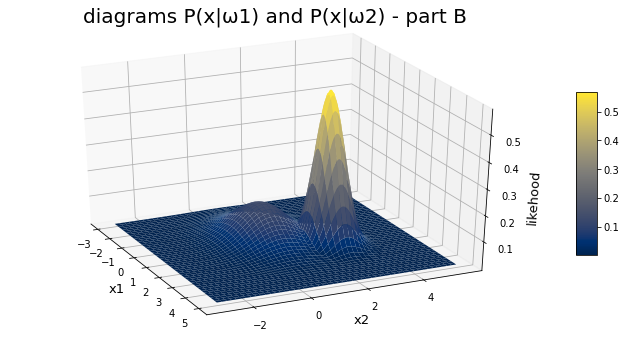

In [ ]:
"""----------------------------------3D PLOT------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
#Make a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, np.where(Px_omega1.pdf(pos) > Px_omega2.pdf(pos), Px_omega1.pdf(pos), Px_omega2.pdf(pos)),cmap='cividis',linewidth=0.2)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_zlabel('likehood', fontsize=13)
ax.set_title(label ='diagrams P(x|\u03C91) and P(x|\u03C92) - ' + part,fontsize=20,pad=15.0)
ax.view_init(30, -25)
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 8)
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
plt.show()


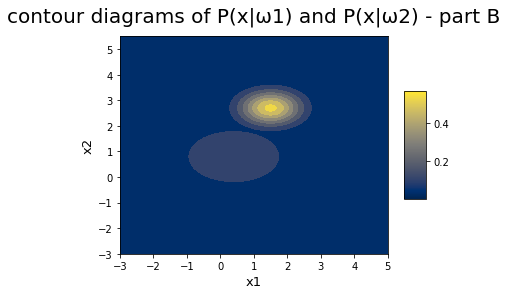

In [ ]:
"""----------------------------------CONTOUR------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

#Make contour plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, np.where(Px_omega1.pdf(pos) > Px_omega2.pdf(pos), Px_omega1.pdf(pos), Px_omega2.pdf(pos)),cmap='cividis')
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 5)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_title(label ='contour diagrams of P(x|\u03C91) and P(x|\u03C92) - ' + part,fontsize=20,pad=15.0)

plt.show()

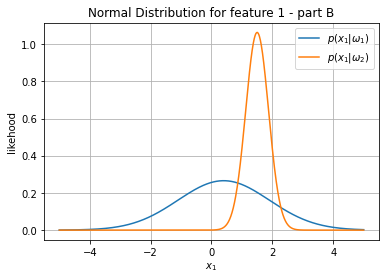

In [ ]:
x = np.linspace(-5,5,1000)
plt.plot(x, norm.pdf(x, mu_class_healthy[0] , covariance_matrix1[0,0]),label = r'$p(x_1|\omega_1)$')

plt.plot(x, norm.pdf(x, mu_class_cancer[0] , covariance_matrix2[0,0]), label = r'$p(x_1|\omega_2)$')
plt.grid()
plt.title('Normal Distribution for feature 1 - ' + part)
plt.xlabel('$x_1$')
plt.ylabel('likehood')
plt.legend()
plt.show()

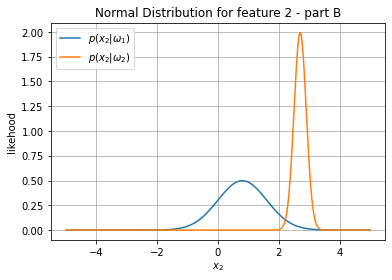

In [ ]:
x = np.linspace(-5,5,1000)
rv1 = norm(mu_class_healthy[1] , covariance_matrix1[1,1])
rv2 = norm(mu_class_cancer[1] , covariance_matrix2[1,1])
plt.plot(x, norm.pdf(x, mu_class_healthy[1] , covariance_matrix1[1,1]),label = r'$p(x_2|\omega_1)$')
plt.plot(x, norm.pdf(x, mu_class_cancer[1] , covariance_matrix2[1,1]), label = r'$p(x_2|\omega_2)$')
plt.grid()
plt.title('Normal Distribution for feature 2 - ' +part)
plt.xlabel('$x_2$')
plt.ylabel('likehood')
plt.legend()
plt.show()

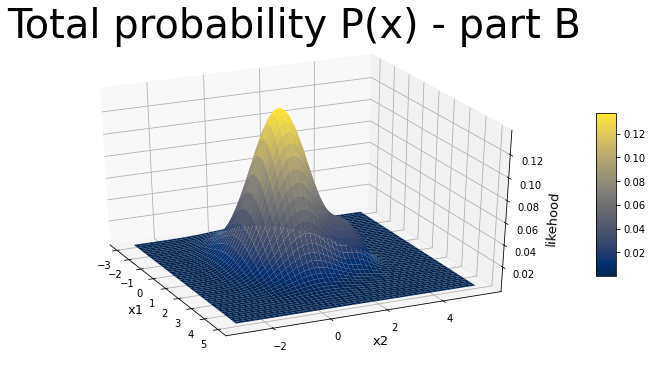

In [ ]:
"""----------------------------------3D PLOT OF TOTAL PROBABILITY------------------------------------"""
x = np.linspace(-3,5,1000)
y = np.linspace(-3,5.5,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#Make a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, totalProbability,cmap='cividis',linewidth=0.2)

ax.set_xlabel('x1', fontsize=13)
ax.set_ylabel('x2', fontsize=13)
ax.set_zlabel('likehood', fontsize=13)
ax.set_title(label ='Total probability P(x) - ' + part,fontsize=40,pad=20.0)
ax.view_init(30, -25)
fig.colorbar(surf, ax = ax,shrink = 0.5, aspect = 8)
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
plt.show()

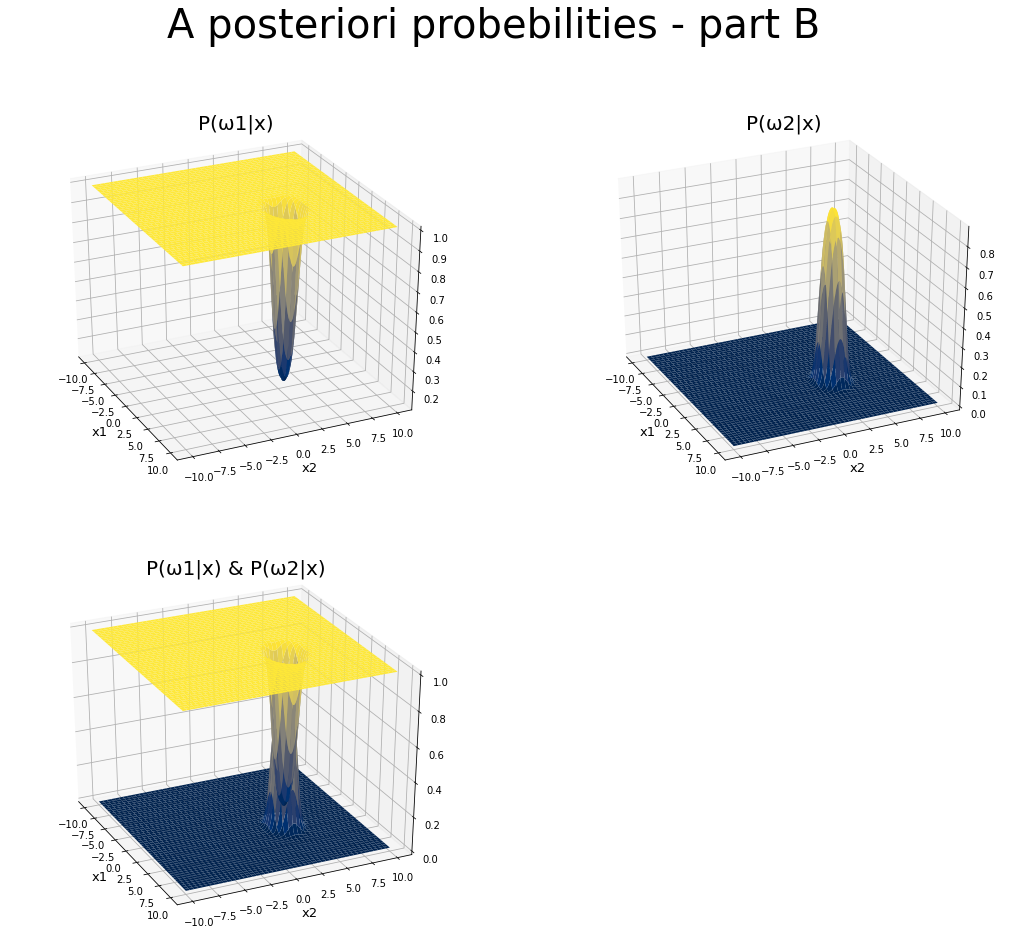

In [ ]:
"""----------------------------------3D PLOT OF A POSTERIORI PROBABILITIES ------------------------------------"""
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#calculate a posteriori probabilities for the two categories
Pomega1_x = (Px_omega1.pdf(pos) * P_omega1) / totalProbability
Pomega2_x = (Px_omega2.pdf(pos) * P_omega2) / totalProbability

#create the 3D plots
fig = plt.figure(figsize = (18,15))
fig.suptitle("A posteriori probebilities - " + part,fontsize=40)

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

ax1.plot_surface(X, Y, Pomega1_x,cmap='cividis',linewidth=0)
ax1.set_xlabel('x1', fontsize=13)
ax1.set_ylabel('x2', fontsize=13)
ax1.set_title(label ='P(\u03C91|x)',fontsize=20,pad=15.0)
ax1.view_init(30, -25)

ax2.plot_surface(X, Y, Pomega2_x,cmap='cividis',linewidth=0)
ax2.set_xlabel('x1', fontsize=13)
ax2.set_ylabel('x2', fontsize=13)
ax2.set_title(label ='P(\u03C92|x)',fontsize=20,pad=15.0)
ax2.view_init(30, -25)

ax3.plot_surface(X, Y, Pomega1_x,cmap='cividis',linewidth=0)
ax3.plot_surface(X, Y, Pomega2_x,cmap='cividis',linewidth=0)
ax3.set_xlabel('x1', fontsize=13)
ax3.set_ylabel('x2', fontsize=13)
ax3.set_title(label ='P(\u03C91|x) & P(\u03C92|x)',fontsize=20,pad=15.0)
ax3.view_init(30, -25)

plt.show()

In [ ]:
#Calculate Bayesian error
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

totalProbability = Px_omega1.pdf(pos) * P_omega1 + Px_omega2.pdf(pos) * P_omega2

#calculate a posteriori probabilities for the two categories
Pomega1_x = (Px_omega1.pdf(pos) * P_omega1) / totalProbability
Pomega2_x = (Px_omega2.pdf(pos) * P_omega2) / totalProbability

error = 0

for i in range(0,1000):
  for j in range(0,1000):
    if Pomega1_x[i][j] > Pomega2_x[i][j]:
      error = error + Px_omega2.pdf(pos[i,j,:]) * P_omega2 *0.0004
    if Pomega2_x[i][j] >= Pomega1_x[i][j]:
      error = error + Px_omega1.pdf(pos[i,j,:]) * P_omega1 * 0.0004
      
print("Bayesian error for " + part + " is:" ,error)

Bayesian error for part B is: 0.028971741016928437
